### Decision Trees

Decision Tree is a machine learning algorithms which is designed to make classifications or predict numeric values (regressor). It does not make a `linear` relation between the input features and the target value.

Decision trees divide the dataset into multiple `atomic` classes, by using the input fields. `Atomic` class simply means that it cannot be divided further, and represents the end of the decision tree.

Structurally, a decision tree has the following components:
- `Root node`: this is the beginning of the decision tree
- `Branch nodes`: these are interstitial nodes which can be divided further
- `Leaf nodes`: these are the final nodes of a decision tree which cannot be divided further and represent a class.

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
insurance_data = pd.read_csv(r"https://raw.githubusercontent.com/puneettrainer/datasets/main/insurance_fraud.csv")
insurance_data.columns

Index(['ACCOUNT_AGE', 'CUSTOMER_AGE', 'POLICY_NUMBER', 'POLICY_START_DATE',
       'POLICY_STATE', 'LIABILITY_AMOUNT', 'DEDUCTABLE', 'ANNUAL_FEE',
       'UMBRELLA_LIMIT', 'ZIP_CODE', 'GENDER', 'EDUCATION_LEVEL', 'OCCUPATION',
       'CAPITAL_GAINS', 'INCIDENT_DATE', 'INCIDENT_TYPE', 'COLLISION_TYPE',
       'INCIDENT_SEVERITY', 'AUTHORITIES', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_HOUR', 'NUMBER_OF_VEHICLES', 'PROPERTY_DAMAGE',
       'BODILY_INJURIES', 'WITNESSES', 'POLICE_REPORT', 'TOTAL_CLAIM_AMOUNT',
       'INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM', 'AUTO_MAKE',
       'AUTO_MODEL', 'AUTO_YEAR', 'FRAUD'],
      dtype='object')

In [3]:
target_field = 'FRAUD'
input_fields = ['ACCOUNT_AGE', 'CUSTOMER_AGE', 'LIABILITY_AMOUNT', 'DEDUCTABLE', 'ANNUAL_FEE',
                'UMBRELLA_LIMIT', 'GENDER', 'EDUCATION_LEVEL', 'OCCUPATION', 'CAPITAL_GAINS', 'INCIDENT_TYPE', 'INCIDENT_SEVERITY',
                'AUTHORITIES', 'NUMBER_OF_VEHICLES', 'TOTAL_CLAIM_AMOUNT']

In [4]:
categorical_fields = list(insurance_data[input_fields].select_dtypes(exclude='number').columns)

In [5]:
training_data, test_data = train_test_split(insurance_data
                                           ,test_size=0.3
                                           ,random_state=10)

In [6]:
encoder = OneHotEncoder().fit(insurance_data[categorical_fields])
training_data.loc[:, encoder.get_feature_names_out()] = encoder.transform(training_data[categorical_fields]).toarray()
test_data.loc[:, encoder.get_feature_names_out()] = encoder.transform(test_data[categorical_fields]).toarray()

In [7]:
input_fields = list(insurance_data[input_fields].select_dtypes(include='number')) + list(encoder.get_feature_names_out())

In [8]:
model = DecisionTreeClassifier()
model.fit(training_data[input_fields], training_data[target_field])
predictions = model.predict(test_data[input_fields])

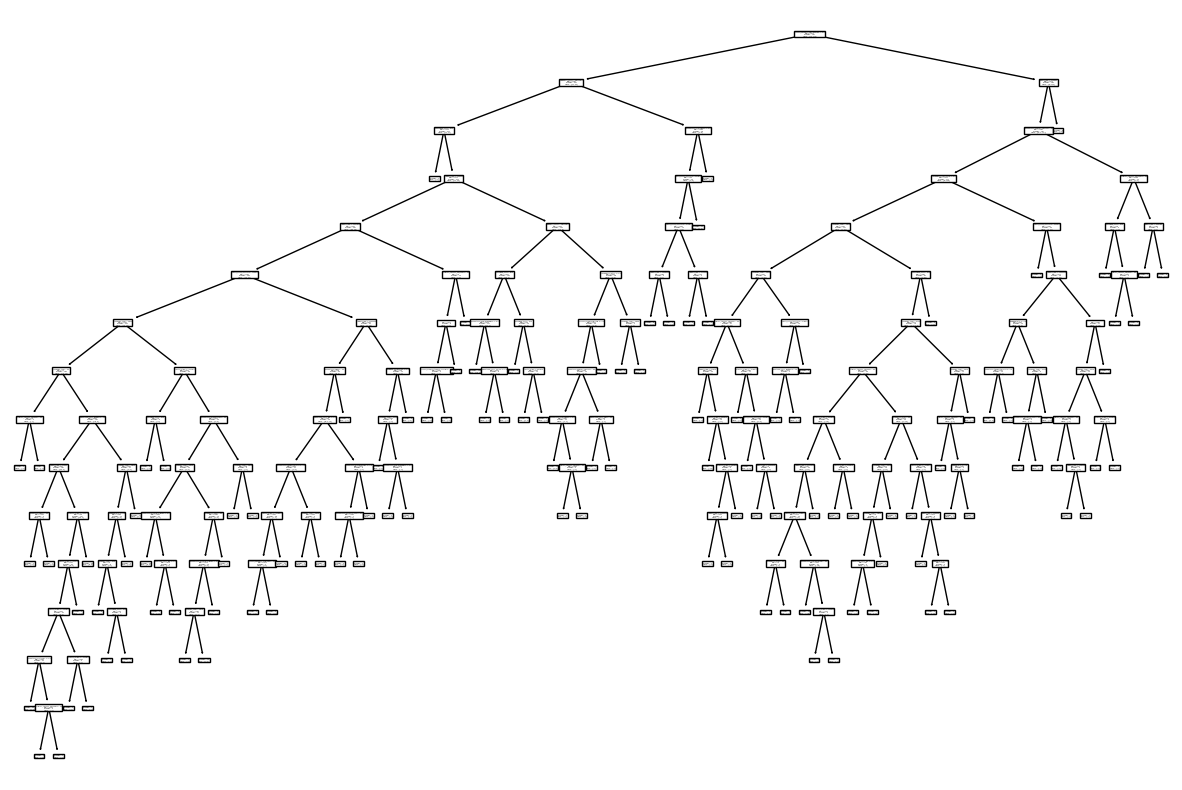

In [9]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=input_fields)
plt.show()

### Decision Tree for `classification` using `gini`

When we use a decision tree for classification problems, the algorithm aims to divide the dataset such that each resultant node ideally represents a single class. Another criteria for division is to divide the data as much as possible, in terms of magnitude.

One of the metrics used to quantify this division is the `gini score`.

Steps to calculate Gini score:
Let's assume we are building the decision tree based on whether EDUCATION_LEVEL is `PhD` or not.

<img src="https://raw.githubusercontent.com/puneettrainer/pics/main/gini_1.jpg" style="margin: auto;">

$\text{Gini score of PhD node} = 1 - \text{(probability of fraud)}^2 - \text{(probability of no fraud)}^2$

$\implies 1 - (\frac{23}{90}) ^ 2 - (\frac{67}{90}) ^ 2 = 0.380 $

Similarly,<br>
$\text{Gini score of non-PhD node} = 1 - (\frac{152}{610}) ^ 2 - (\frac{468}{610}) ^ 2 = 0.349$

$\text{Gini score for PhD as a node} = \text{weighted average of the above nodes}$
$\implies \frac{90}{700} \times 0.380 + \frac{610}{700} \times 0.349 = 0.352$

Let's assume we are building the decision tree based on whether OCCUPATION is `sales` or not.

<img src="https://raw.githubusercontent.com/puneettrainer/pics/main/gini_2.jpg" style="margin: auto;">

$\text{Gini score of sales node} = 1 - (\frac{16}{57}) ^ 2 - (\frac{41}{57}) ^ 2 = 0.403 $

Similarly,<br>
$\text{Gini score of non-sales node} = 1 - (\frac{159}{643}) ^ 2 - (\frac{484}{643}) ^ 2 = 0.372$

$\text{Gini score for sales as a node} = \text{weighted average of the above nodes}$
$\implies \frac{57}{700} \times 0.403 + \frac{643}{700} \times 0.349 = 0.353$


For numeric fields in a classification problem, the value is computed by finding the smallest gini score computed by the average of adjacent values.

### Decision Tree for `classification` using `entropy`

Steps to split based on entropy:<br>
Let's assume we are building the decision tree based on whether EDUCATION_LEVEL is `PhD` or not.

<img src="https://raw.githubusercontent.com/puneettrainer/pics/main/entropy_1.jpg" style="margin: auto;">

$\text{entropy} = - \sum{p(x)log_n(p(x))}$

Here,<br>
$n \implies the number of classes$

Based on the above formula for entropy,<br>
$\text{entropy}_{root} = - [\frac{90}{700}log_2(\frac{90}{700}) + \frac{610}{700}log_2(\frac{610}{700})]$

$\implies \text{entropy}_{root} = (- (0.128 \times (-2.965)) + (0.871 \times (-0.198)))$
$\implies \text{entropy}_{root} = 0.553$


Also,
$\text{entropy}_{Y} = - [\frac{23}{90}log_2(\frac{23}{90}) + \frac{67}{90}log_2(\frac{67}{90})]$

and
$\text{entropy}_{N} = - [\frac{152}{610}log_2(\frac{152}{610}) + \frac{468}{610}log_2(\frac{468}{610})]$<br>

$Information Gain = \text{}$

### Decision Tree for `regression`

When we are trying to predict a numeric, continuous value, `gini` score is not as useful for constructing a decision tree. In these cases, we make use of `sum of squared residuals`.

For example, let's say in this dataset, we are trying to predict the claim amount based on age. To build a decision tree for predicting this value, we start off by splitting data based on age.

In [10]:
ages = pd.DataFrame({'age':training_data['CUSTOMER_AGE'].sort_values().unique()})
ages['mean'] = ages['age'].rolling(2).mean()
ages

,age,mean
0,19,NaN
1,21,20.0
2,22,21.5
3,23,22.5
4,24,23.5
5,25,24.5
6,26,25.5
7,27,26.5
8,28,27.5
9,29,28.5


To create a regression tree, the algorithm will iteratively try to split the data such that the sum of squared residuals comes out to be as low as possible.

From the above age details, we start off by splitting the dataset based on `age >= 20`.

This will split the dataset, such that on one side we have all those records where customer age is less than 20 and another node where the customer ages are equal to or greater than 20. The predicted claim amount will be the average claim amount of all these records.

<img src="https://raw.githubusercontent.com/puneettrainer/pics/main/dt_reg.jpg" style="margin: auto;">

To evaluate whether this is the best way to split the data, we calculate the sum of squared residuals.

In [11]:
mean_claim_yes = training_data.loc[training_data['CUSTOMER_AGE'] >= 20, 'TOTAL_CLAIM_AMOUNT'].mean()
mean_claim_no = training_data.loc[training_data['CUSTOMER_AGE'] < 20, 'TOTAL_CLAIM_AMOUNT'].mean()

In [12]:
avg_claim = training_data.groupby(['CUSTOMER_AGE']).agg({'TOTAL_CLAIM_AMOUNT':'mean'})
avg_claim.reset_index(inplace=True)
avg_claim

,CUSTOMER_AGE,TOTAL_CLAIM_AMOUNT
0,19,48950.000000
1,21,75592.500000
2,22,86130.000000
3,23,59646.666667
4,24,43595.000000
5,25,46294.000000
6,26,58584.090909
7,27,55594.166667
8,28,58747.272727
9,29,53223.846154


In [13]:
training_data.columns

Index(['ACCOUNT_AGE', 'CUSTOMER_AGE', 'POLICY_NUMBER', 'POLICY_START_DATE',
       'POLICY_STATE', 'LIABILITY_AMOUNT', 'DEDUCTABLE', 'ANNUAL_FEE',
       'UMBRELLA_LIMIT', 'ZIP_CODE', 'GENDER', 'EDUCATION_LEVEL', 'OCCUPATION',
       'CAPITAL_GAINS', 'INCIDENT_DATE', 'INCIDENT_TYPE', 'COLLISION_TYPE',
       'INCIDENT_SEVERITY', 'AUTHORITIES', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_HOUR', 'NUMBER_OF_VEHICLES', 'PROPERTY_DAMAGE',
       'BODILY_INJURIES', 'WITNESSES', 'POLICE_REPORT', 'TOTAL_CLAIM_AMOUNT',
       'INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM', 'AUTO_MAKE',
       'AUTO_MODEL', 'AUTO_YEAR', 'FRAUD', 'LIABILITY_AMOUNT_100/300',
       'LIABILITY_AMOUNT_250/500', 'LIABILITY_AMOUNT_500/1000',
       'GENDER_FEMALE', 'GENDER_MALE', 'EDUCATION_LEVEL_Associate',
       'EDUCATION_LEVEL_College', 'EDUCATION_LEVEL_High School',
       'EDUCATION_LEVEL_JD', 'EDUCATION_LEVEL_MD', 'EDUCATION_LEVEL_Masters',
       'EDUCATION_LEVEL_PhD', 'OCCUPATION_adm-clerical',
  